# Law of Large Numbers

%%latex
\textbf{Strong Law (LLN):} Sample average converges \textit{almost surely a.s} to population mean. 
Mathematically speaking, as N $\to \infty$

\begin{equation} \bar{X}_N=\frac{X_1 +X_2+...+X_N}{N} \to \mu \end{equation} 

The probability that, as the number of trials N goes to infinity, the average of the observations converges to the expected value, is equal to one
\\ $$Pr(\lim_{N\to\infty} \bar{X}_N = \mu)=1 $$
\textbf{Weak Law (LLN) Khinchin law :}  The sample average converges in \textit{probability} towards the expected value. 
$$\lim_{N\to\infty} Pr(| \bar{X}_N - \mu|>\epsilon) = 0$$

In [1]:
## LAW OF LARGE NUMBERS

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spstats

def lln(ssize,dist):
    #print(ssize,dist)
    #print(type(ssize),type(dist))
    
    np.random.seed(200) # set seed for reproducability of results
    
    "PLOT SAMPLE DISTRIBUTION"
    ss = ssize
    dist_type = dist
    
    def normal():
        th_std_norm = spstats.norm(0,1) #  Std normal
        samp_std_norm = th_std_norm.rvs(ss)     
        return th_std_norm, samp_std_norm
    def uniform():
        th_uniform = spstats.uniform(0,1) # Uniform: a=lowerbound =0.0 ; b=upperbound =1.0
        samp_uniform = th_uniform.rvs(ss)     
        return th_uniform, samp_uniform 
    def binomial():
        th_binomial = spstats.binomial(n=10,p=0.5) # Num trials = 10, prob= 0.5
        samp_binomial = th_binomial.rvs(ss)     
        return th_binomial, samp_binomial 
    def poisson():
        #tmp = np.random.poisson(lam=2,size=ss) 
        th_poisson = spstats.poisson(lam=2) #lam = average occurence of discrete event
        samp_poisson = th_poisson.rvs(ss)     
        return th_poisson, samp_poisson    
    def logistic():
        # tmp = np.random.logistic(loc=0,scale=2,size=ss) #default: loc =mean of the peak= 0; scale =standard deviation=1
        th_logistic = spstats.logistic(loc=0,scale=2) #lam = average occurence of discrete event
        samp_logistic = th_logistic.rvs(ss)     
        return th_logistic, samp_logistic 
    def multinomial():
        #tmp = np.random.multinomial(n=6,pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],size=ss) #default(dice roll): n= numoutcomes=6; pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
        th_multionomial = spstats.multinomial(n=6,pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) #lam = average occurence of discrete event
        samp_multinomial = th_multionomial.rvs(ss)     
        return th_multionomial, samp_multinomial
    def exponential():
        #tmp = np.random.exponential(scale=1,size=ss) #default: scale =inverse of rate =1.0.
        th_exponential = spstats.expon(scale=1) #default: scale =inverse of rate =1.0.
        samp_exponential = th_exponential.rvs(ss)     
        return th_exponential, samp_exponential    
    def chisquare():
        #tmp = np.random.chisquare(df=5,size=ss) #df - (degree of freedom).
        th_chisquare = spstats.chisquare(df=5) #default: scale =inverse of rate =1.0.
        samp_chisquare = th_chisquare.rvs(ss)     
        return th_chisquare, samp_chisquare 
    def rayleigh():
        #tmp = np.random.rayleigh(scale=1.0,size=ss) #default:scale - (standard deviation)=1.0
        th_rayleigh = spstats.rayleigh(scale=1.0) #default: scale =inverse of rate =1.0.
        samp_rayleigh = th_rayleigh.rvs(ss)     
        return th_rayleigh, samp_rayleigh 
    def pareto():
        #tmp = np.random.pareto(a=2,size=ss) # a - shape parameter.
        th_pareto = spstats.pareto(a=2) # a - shape parameter
        samp_pareto = th_pareto.rvs(ss)     
        return th_pareto, samp_pareto
    def zipf():
        #tmp = np.random.zipf(a=2, size=ss) # a - shape parameter.
        th_zipf = spstats.zipf(a=2) # a - shape parameter
        samp_zipf = th_zipf.rvs(ss)     
        return th_zipf, samp_zipf
    def the_count():
        print("No distribution chosen")
    
    # Dispatcher aides in calling different functions based on parameters.    
    dispatcher = {
        'Normal': normal, 'Uniform': uniform, 'Binomial': binomial, 'Poisson': poisson, 'Logistic': logistic, 
        'Multinomial': multinomial, 'Exponential': exponential, 'Chi-square': chisquare, 'Rayleigh': rayleigh, 
        'Pareto': pareto, 'Zipf': zipf, 'The_count': the_count
    }

    x, y = dispatcher[dist_type]() # Assign return value of different function calls (normal,uniform,etc.) to x.
    #print(x)
    
    fig, ax = plt.subplots(1,1,sharey=True,figsize = (5,5))

    pop_mu = x.mean()
    pop_sigma = x.std()
    sample_mu = y.mean()
    sample_sigma = y.std()
    min_xlim, max_xlim = plt.xlim()
    min_ylim, max_ylim = plt.ylim()
    #print(min_xlim, max_xlim,min_ylim, max_ylim)
    boxtext = '\n'.join((
    r'Population $\mu= %.3f$' % (pop_mu, ),
    r'Population $\sigma= %.3f$' % (pop_sigma, ),
    r'Sample Size= %.f ' % (ss, ),
    r'Sample Mean= %.3f' % (sample_mu, ),
    r'Sample S.D= %.3f' % (sample_sigma, ),
    ))
    props = dict(boxstyle='round', facecolor='grey', alpha=0.5)
    #sns.distplot(x,color='Green')
    ax.hist(y,bins=50,color='Orange',density=1, alpha=0.5)
    ax.axvline(x.mean(), color='Red', linestyle=':', linewidth=1.5)
    ax.axvline(y.mean(), color='Blue', linestyle='-', linewidth=1)
    fig.text(1,1, boxtext, fontsize=12,ha='left', va='top', bbox=props)
    ax.set_title("Distribution of {} Random Sample (Size ={})".format(dist_type,ss))
    ax.set_xlabel("Outcome (x)")
    ax.set_ylabel("Density")
    fig.savefig('lln.png', bbox_inches="tight")
    #print(type(fig))
    #print(type(ax))
    return x


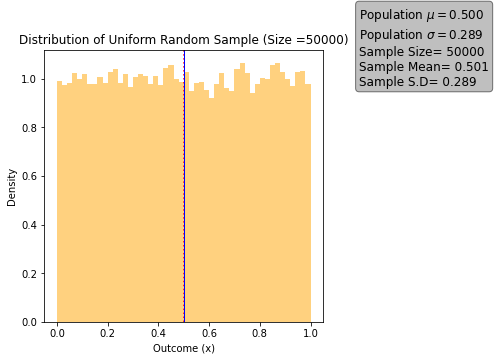

In [2]:
y= lln(50000,'Uniform')
